In [1]:
# Загружаем необходимые библиотеки

from scipy.io import wavfile
from scipy.fftpack import fft
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from IPython.display import Audio
import numpy as np

%matplotlib inline

sample_rate, data = wavfile.read('sound/1.wav')

## Encoding

In [2]:
t = np.linspace(0,3,44100*3)

In [8]:
sig = []

t0 = 0
delta = 1/44100

string = '101010010011110011101010101010101001010101010111111111'
          
for i in range(len(string)//2):
    l = string[i*2:i*2+2]
    if l == '00':
        delta = 1/44100
    if l == '01':
        delta = 2/44100
    if l == '10':
        delta = 3/44100
    if l == '11':
        delta = 4/44100
        
    for j in range(44100//20):
        t0 = t0 + delta
        sig.append(5*np.sin(2*np.pi*440*t0))

In [9]:
len(string)

54

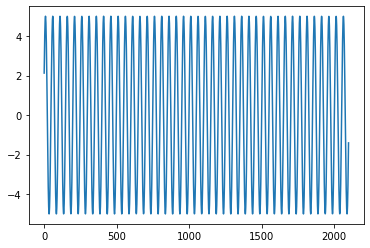

In [10]:
plt.plot(sig[43000:45100])

In [7]:
# record this audio using your mircophone and save as wav

Audio(data=sig,rate=44100)

## Decoding

In [ ]:
sample_rate, data = wavfile.read('rec4.wav')

In [136]:
data=np.array(data,dtype=np.int64)

In [137]:
Audio(data=data[:,0],rate=sample_rate)

In [148]:
A = []

for i in range(len(data)//(sample_rate//20)):
    temp = data[sample_rate//20*i:sample_rate//20*(i+1),0]
    f = fft(temp,sample_rate)
    res = np.argmax(np.abs(f)[0:2000])
    
    #if np.sum(temp**2) < 22618611114:
    #    continue
        
    if res > 420 and res < 460:
        print('00',end='')
        A.append(sum(temp**2))
    if res > 850 and res < 900:
        print('01',end='')
        A.append(sum(temp**2))
    if res > 1300 and res < 1340:
        print('10',end='')
        A.append(sum(temp**2))
    if res > 1740 and res < 1780:
        print('11',end='')
        A.append(sum(temp**2))

1010100100111111111010101010101010010101010101111111111111

In [ ]:
# compare result with original string